In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Reading the dataset from csv file
clas_data = pd.read_csv('Clas.csv')

In [3]:
#get some data by head() and info()
clas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [4]:
clas_data.head(5)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


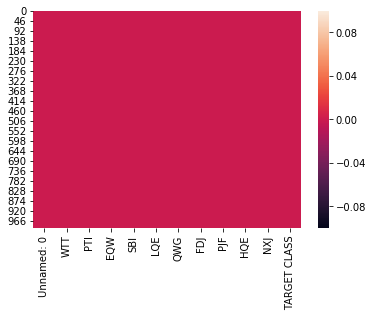

In [5]:
# We can draw the heatmap to see if there are any null values in the dataset

sns.heatmap(clas_data.isnull())

In [8]:
# We can see from heatmap that there are no null values
#apply standard scaling, import libraries

from sklearn.preprocessing import StandardScaler

# create object of StandardScaler class

scalar = StandardScaler()


In [11]:
scalar.fit(clas_data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_feature= scalar.transform(clas_data.drop('TARGET CLASS', axis=1))

In [13]:
print(scaled_feature)

[[-1.73031962 -0.12354188  0.18590747 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.72685552 -1.08483602 -0.43034845 ... -0.20224031 -1.82805088
   0.63675862]
 [-1.72339142 -0.78870217  0.33931821 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 1.72339142  0.64177714 -0.51308341 ... -2.36249443 -0.81426092
   0.11159651]
 [ 1.72685552  0.46707241 -0.98278576 ... -0.03677699  0.40602453
  -0.85567   ]
 [ 1.73031962 -0.38765353 -0.59589427 ... -0.56778932  0.3369971
   0.01034996]]


In [14]:
print(type(scaled_feature))

<class 'numpy.ndarray'>


In [15]:
# here we can see that the type of scaled_feature is array, so convert it to dataframe

clas_feat = pd.DataFrame(scaled_feature,columns=clas_data.columns[:-1] )

In [16]:
clas_feat.head(5)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [22]:
# now data is ready, we can apply train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clas_feat,clas_data['TARGET CLASS'], test_size=0.30,random_state=101)


In [23]:
#K-Nearest Neighbor classification 
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# create object of KNeighborsClassifier and specify the value of neighbor

knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
# use fit function on X_train and y_train
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
#Predict the value using predict function
ypred = knn.predict(X_test)


In [27]:
#print the predicted values
print(ypred)

[0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0]


In [28]:
# For confusion matrix import library
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ypred))

[[145  14]
 [ 12 129]]


In [29]:
# we can see the error rate with existing model
np.mean(y_test != ypred)

0.08666666666666667

In [32]:
# find error rate for n neighbors

error_rate=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

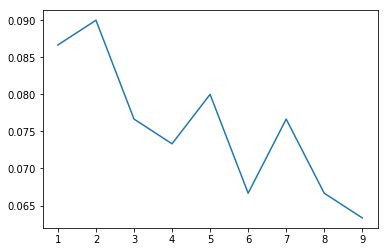

In [33]:
plt.plot(range(1,10),error_rate)

In [ ]:
# from the aove plot we can see that error rate is minimum when value of neighbour is 6